# Task 4: Loan Approval Prediction Description 
## *Description:*
1. Dataset (Recommended): Loan-Approval-Prediction-Dataset (Kaggle).
2. Build a model to predict whether a loan application will be approved.
3. Handle missing values and encode categorical features.
4. Train a classification model and evaluate performance on imbalanced data.
5. Focus on precision, recall, and F1-score.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,roc_auc_score,classification_report,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier

In [3]:
data = pd.read_csv('loan_approval_dataset.csv')
data.shape

(4269, 13)

In [4]:
data.head(3)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected


## Missing data?

In [5]:
data.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

## Number of Numerical & Categorical columns

In [6]:
numerical_cols = data.select_dtypes(include=['number']).columns.tolist()
print("Numerical Columns:", len(numerical_cols))

Numerical Columns: 10


In [7]:
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", len(categorical_cols))

Categorical Columns: 3


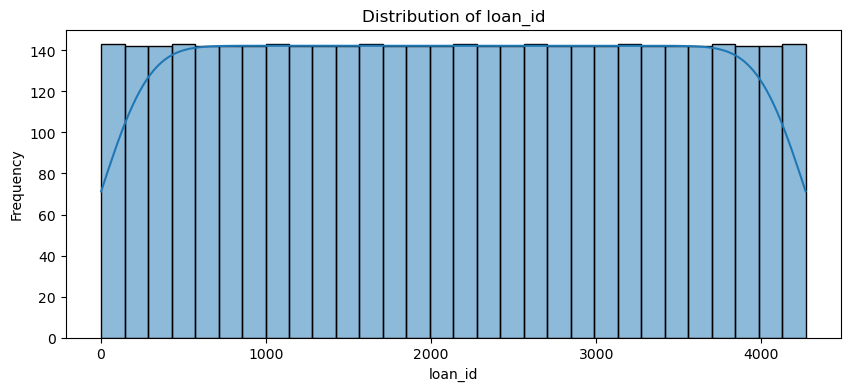

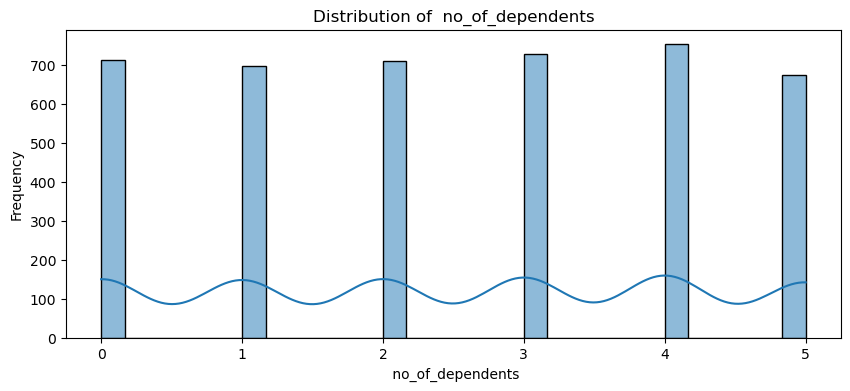

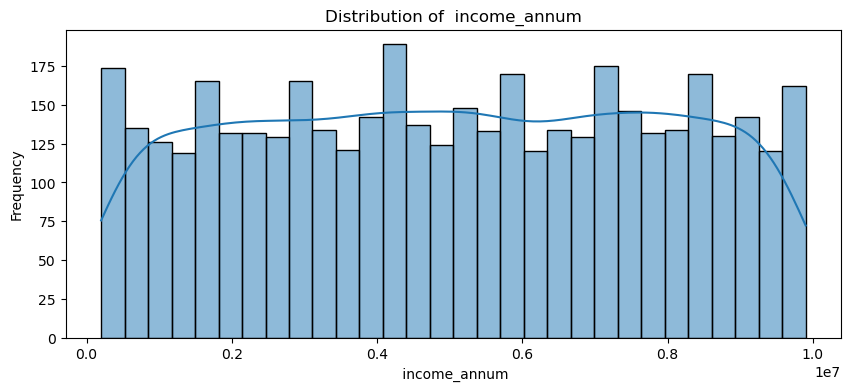

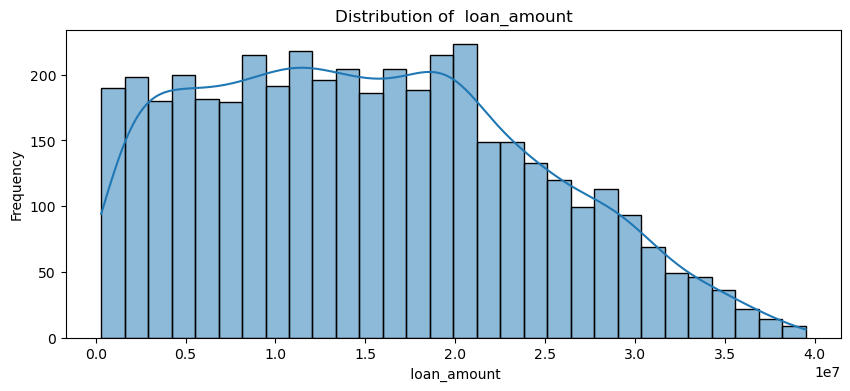

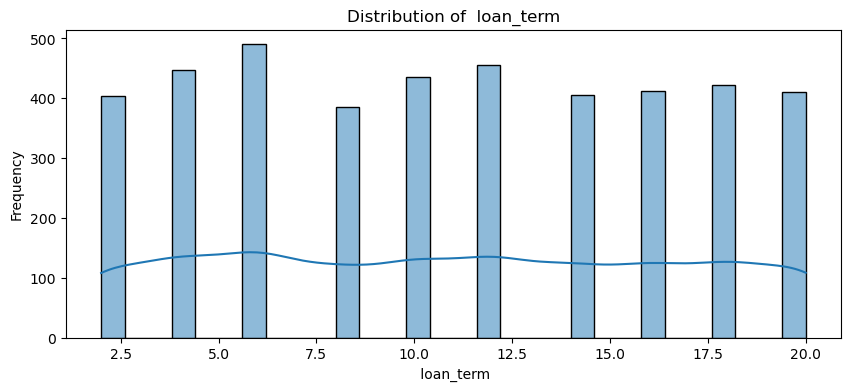

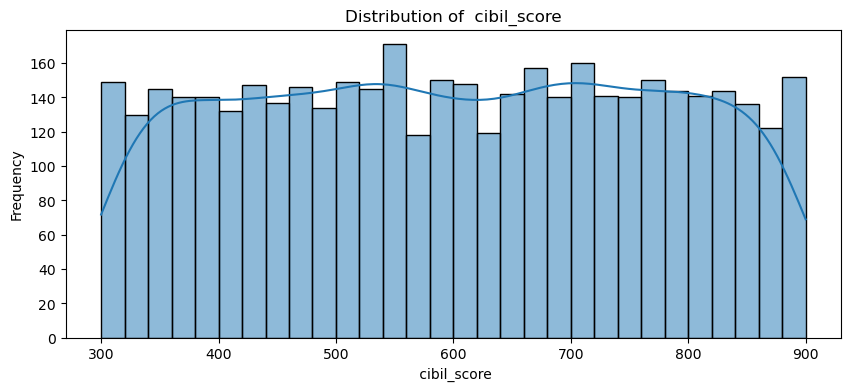

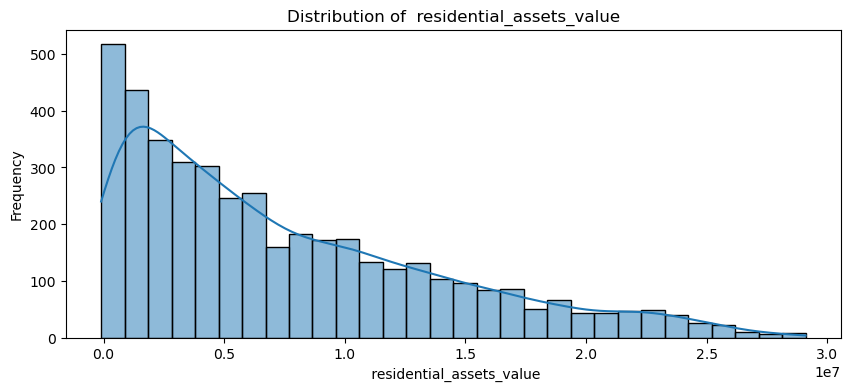

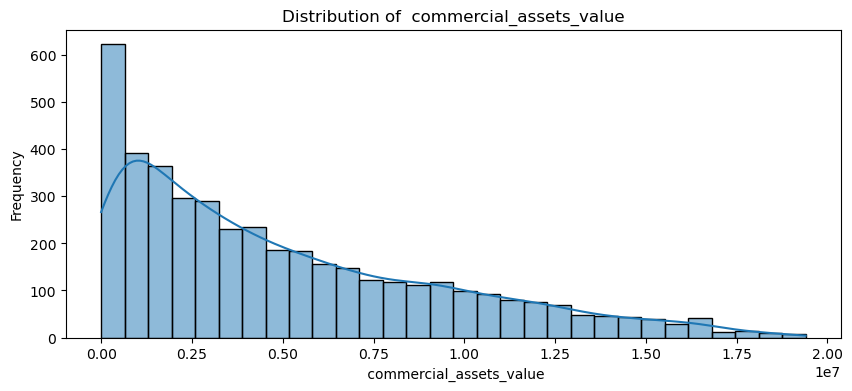

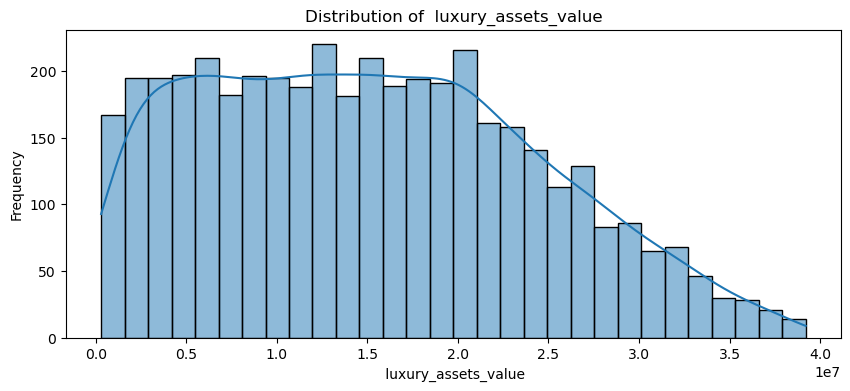

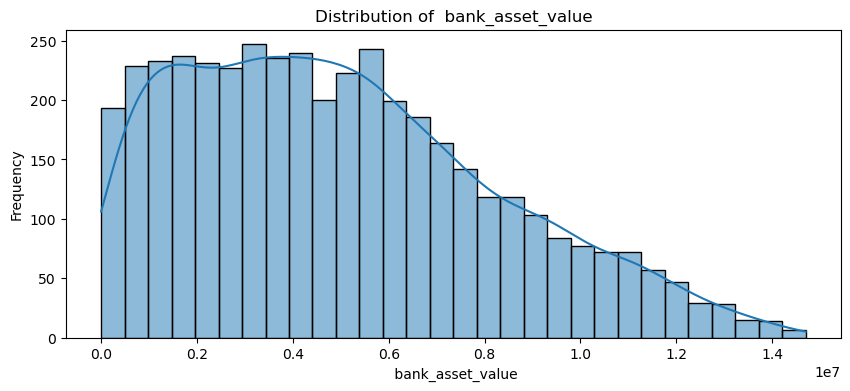

In [8]:
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

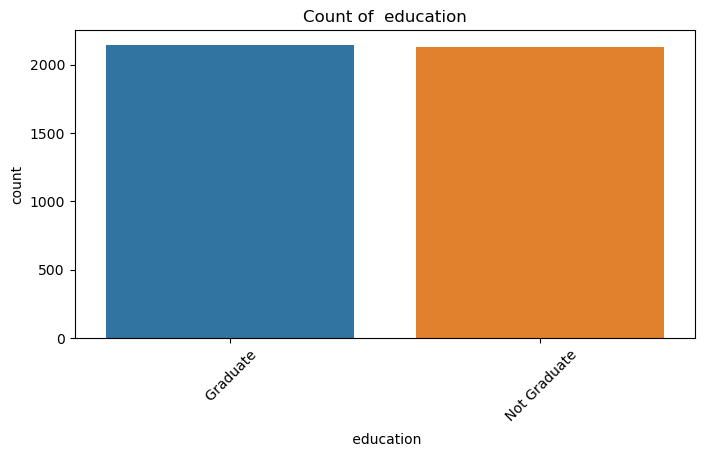

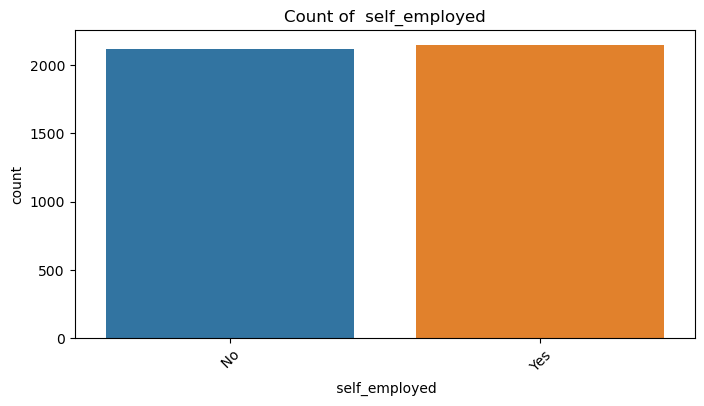

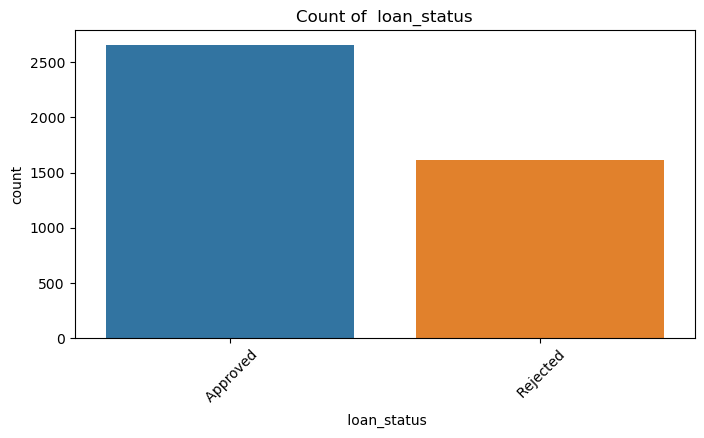

In [9]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()

## Convert Categorical features to Numerical 

In [10]:
lb = LabelEncoder()
for col in categorical_cols:
    data[col] = lb.fit_transform(data[col])

In [11]:
data.head(2)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1


### Data Splitting

In [12]:
X = data.drop(columns=['loan_id', ' loan_status'])
y = data[' loan_status']

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

### Random Forest Model

In [14]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

### Accuracy

In [ ]:
print(f'Accuracy: {accuracy_score(y_test,y_pred)*100:.2f}%')

Accuracy: 97.74%


### ROC Score

In [16]:
print(f'ROC score: {roc_auc_score(y_test,y_pred)*100:.2f}')

ROC score: 97.37


### Precision Score

In [17]:
print(f'Precision score:{precision_score(y_test,y_pred):.2f}')

Precision score:0.98


### Recall Score

In [18]:
print(f'Recall score: {recall_score(y_test,y_pred):.2f}')

Recall score: 0.96


### F1-Score

In [22]:
print(f'F1-score: {f1_score(y_test,y_pred):.2f}')

F1-score: 0.97


### Confusion Matrix

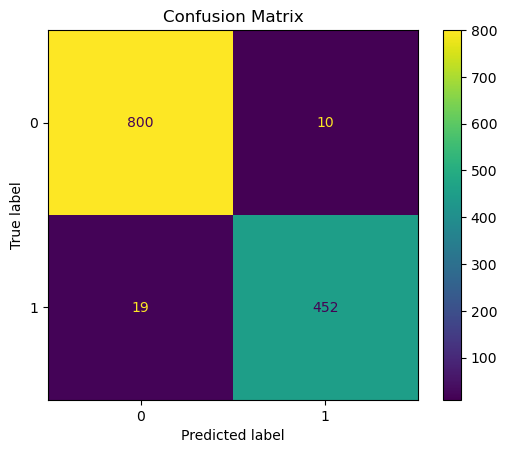

In [20]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(ax=plt.gca())
plt.title('Confusion Matrix')
plt.show()

### Classification Report

In [23]:
print('Classification Report\n',classification_report(y_test,y_pred))

Classification Report
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       810
           1       0.98      0.96      0.97       471

    accuracy                           0.98      1281
   macro avg       0.98      0.97      0.98      1281
weighted avg       0.98      0.98      0.98      1281



In [26]:
performance = pd.DataFrame({'model':['Random Forest'],
                            'Accuracy':[' 97.74%'],'Precision Score':[0.98],
                            'Recal Score':[0.96],'F1 Score':[0.97]})
performance

,model,Accuracy,Precision Score,Recal Score,F1 Score
0,Random Forest,97.74%,0.98,0.96,0.97
